# Diamonds
## Introduction
###### A dataset containing the prices and other attributes of almost 54,000 diamonds. The variables are as follows:
price
price in US dollars (\$326--\$18,823)

carat
weight of the diamond (0.2--5.01)

cut
quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color
diamond colour, from D (best) to J (worst)

clarity
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x
length in mm (0--10.74)

y
width in mm (0--58.9)

z
depth in mm (0--31.8)

depth
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table
width of top of diamond relative to widest point (43--95)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
# To read the diamonds and get the DataFrame.
filename = "https://raw.githubusercontent.com/Yuehao-Wang/AIM-5001/master/data/diamonds.csv"
raw_df = pd.read_csv(filename)

# To see the head of data set
raw_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# To see the count of rows and the count of columns
raw_df.shape

(53940, 10)

In [4]:
# To see data types
raw_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
# check null data
raw_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Selecting Appropriate Plots During Exploratory Data Analysis
| column | data type | chart |
| :---   | :---      | :---  |
| carat | Continuous/ratio | boxplot |
| cut | Categorical/nominal | bar chart |
| color | Categorical/nominal | bar chart |
| clarity | Categorical/nominal | bar chart |
| depth | Continuous/interval | Histogram, boxplot |
| table | Continuous/interval | Histogram, boxplot |
| price | Continuous/ratio | Histogram, boxplot |
| x | Continuous/ratio | Histogram, boxplot |
| y | Continuous/ratio | Histogram, boxplot |
| z | Continuous/ratio | Histogram, boxplot |

# Data Preparation
- To get a copy of all data
- To remove x = 0.0, y = 0.0, z = 0.0, depth = 0.0, because a real diamond is a solid crystal and it has three non-zero dimensions.

In [6]:
# To get a copy
df = raw_df.copy()

In [7]:
df[(df['x'] == 0.0) | (df['y'] == 0.0) | (df['z'] == 0.0) | (df['depth'] == 0.0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


The above table show that data are x = 0.0, y = 0.0, z = 0.0 and depth = 0.0.

Then, to remove these data.

In [8]:
# To remove x = 0.0, y = 0.0, z = 0.0, depth = 0.0
df = df.drop(df[df['x'] == 0.0].index)
df = df.drop(df[df['y'] == 0.0].index)
df = df.drop(df[df['z'] == 0.0].index)
df = df.drop(df[df['depth'] == 0.0].index)
df.shape

(53920, 10)

In [9]:
df[(df['x'] == 0.0) | (df['y'] == 0.0) | (df['z'] == 0.0) | (df['depth'] == 0.0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


After removing x = 0.0, y = 0.0, z = 0.0, depth = 0.0, the data set has 53,920 rows.

# Data Analysis

#### #1. (3 Points) What proportion of diamonds are between .30 and 1.08 carats?
- To choose carat
- To see basic infromation
- To get the counts of carat (between 0.30 and 1.08 carats)
- To calculate the proportion. Formular is the counts of carat (between 0.30 and 1.08 carats) / total counts

In [10]:
# To choose carat
df1 = df['carat']

In [11]:
# To see basic infromation
df1[df1 > 0].count()

53920

In [12]:
# To get the counts of carat (between 0.30 and 1.08 carats)
count1 = pd.value_counts((df1 >= 0.30) & (df1 <= 1.08))
count1

True     40277
False    13643
Name: carat, dtype: int64

In [13]:
# To calculate the proportion
result1 = count1[1] / df1.shape[0]
result1

0.746977002967359

#### #1 Conclusion
The proportion of diamonds (between 0.30 and 1.08 carats) is 0.7469.

#### #2. (3 Points) How many of the diamonds have equal x and y dimensions?
- To ignore x = 0, y = 0 because a real diamond is a solid crystal and it has three non-zero dimensions. It has removed in Data Preparation.
- To get the counts of formular (x == y)

In [14]:
# To get the number of x == y
pd.value_counts(df['x'] == df['y'])[1]

10

In [15]:
# To show the details and To check the results
df[df['x'] == df['y']]

,carat,cut,color,clarity,depth,table,price,x,y,z
3397,0.30,Ideal,H,VVS2,62.5,54.0,567,4.30,4.30,2.70
10055,0.27,Very Good,F,VVS1,62.0,55.0,591,4.16,4.16,2.59
16516,1.00,Premium,E,VS2,60.0,60.0,6600,6.43,6.43,3.89
16851,1.00,Premium,E,VS2,60.0,60.0,6720,6.43,6.43,3.89
17368,1.22,Premium,G,SI2,62.4,61.0,6969,6.79,6.79,4.23
34302,0.32,Ideal,D,VVS2,62.1,54.0,858,4.40,4.40,2.74
40016,0.42,Ideal,H,VVS1,62.8,57.0,1108,4.79,4.79,3.01
41855,0.61,Premium,G,SI1,60.8,60.0,1255,5.42,5.42,3.31
42127,0.48,Ideal,F,VS2,62.4,54.0,1279,5.03,5.03,3.15
43490,0.51,Premium,F,SI1,61.4,59.0,1421,5.13,5.13,3.16


#### #2 Conclusion
There are 10 diamonds that have equal x and y dimensions

#### #3. (3 Points) How many of the diamonds have a carat less than the mean carat value?
- To calculate the mean carat value
- To get counts of the diamonds that a carat is less than the mean carat value.
- Carat should be greater and equal than 0.20 because the introduction shows carat weight of the diamond (0.2--5.01).

In [16]:
# To get mean of carat
mean3 = df['carat'].mean()

In [17]:
# To get data that they are less than mean of carat, and range of weight is (0.2--5.01)
pd.value_counts((df['carat'] < mean3) & (df['carat'] >= 0.2) & (df['carat'] <= 5.01) )[1]

31125

#### #3 Conclusion
There are 31125 diamonds that have a carat less than the mean carat value.

#### #4. (3 Points) How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal
- To check unique values of cut
- To calculate the number of Premium cut or Ideal cut.

In [18]:
# To check unique values of cut
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

After checking, the data set has 5 types of cut. There are 'Ideal', 'Premium', 'Good', 'Very Good', 'Fair'. They match the context of Introduction.

In [19]:
# To calculate the number of Premium cut or Ideal cut
pd.value_counts((df['cut'] == 'Premium') | (df['cut'] == 'Ideal'))[1]

35328

In [20]:
# To calculate the number of Premium cut
pd.value_counts((df['cut'] == 'Premium'))[1]

13780

In [21]:
# To calculate the number of Ideal cut
pd.value_counts((df['cut'] == 'Ideal'))[1]

21548

#### #4 Conclusion
There are 35328 diamonds that have a Premium cut or Ideal cut. The Premium and Ideal has 13780 and 21548, respectively.

#### #5 (3 Points) Which diamond has the highest price per carat? What is its value?
- To check data that price is 0, 
- To check carat is in the range (0.2, 5.01)
- To add a new column named price per carat. Formular is price / carat.
- To sort column price per carat by descending. Then show the top 1.

In [22]:
# To check price is 0
pd.value_counts(df['price'] == 0.0)

False    53920
Name: price, dtype: int64

In [23]:
# To check carat is in the range [0.2, 5.01]
pd.value_counts((df['carat'] >= 0.2) & (df['carat'] <= 5.01))

True    53920
Name: carat, dtype: int64

After checking, there is no data that the price is equal to zero, and all values of carat are in the range [0.2, 5.01]

In [24]:
# To add a new column named price per carat. Formular is price / carat.
df['price per carat'] = df['price'] / df['carat']

In [25]:
# To check columns
df.shape

(53920, 11)

In [26]:
# To sort column price per carat by descending. Then show the top 1.
df.sort_values(by = 'price per carat', ascending=False).head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z,price per carat
27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154


#### #5 Conclusion
The diamond that index is 27635, carat is 1.04 Carat, cut is Very Good and Color is D has the highest price per carat. Its price per carat is 17828.85.

#### #6 (3 Points) Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set?
- To get the frequencies of 5 type of cuts.
- Using bar chart to illustrate.

In [27]:
# To get the frequencies of 5 type of cuts.
df['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

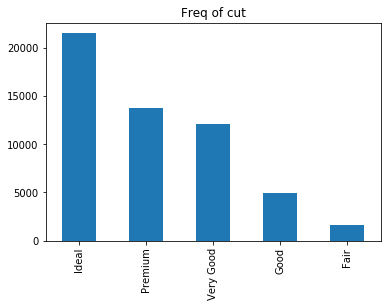

In [28]:
# Using bar chart to illustrate.
bplt6 = df['cut'].value_counts().plot.bar(title = "Freq of cut")
bplt6

#### #6 Conclusion
The above table and bar chart statistics show that Ideal cut diamonds has the highest frequencies (21548). The amount of Premium and Very Good cut diamonds are 13780 and 12081, respectively. The number of Good cut is 4902. The Fair cut has the lowest frequencies (1609).

#### #7 (4 Points) Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots
- To group by cut, then to get mean, std., min, max, count, 25%, 50%, 75% by describe().
- Matrix transpose.
- To illustrate as boxplot.

In [29]:
# To group by cut, then to get mean, std., min, max, count, 25%, 50%, 75% by describe().
df7 = df[['cut', 'price']].groupby('cut').describe()

In [30]:
# After doing transposition, to show describe.
df7.T

cut                  Fair          Good         Ideal       Premium  \
price count   1609.000000   4902.000000  21548.000000  13780.000000   
      mean    4357.500932   3926.403509   3456.941201   4579.684543   
      std     3561.136245   3676.772435   3808.093737   4343.906282   
      min      337.000000    327.000000    326.000000    326.000000   
      25%     2050.000000   1144.250000    878.000000   1046.000000   
      50%     3282.000000   3050.500000   1809.500000   3182.000000   
      75%     5198.000000   5028.000000   4678.000000   6290.250000   
      max    18574.000000  18707.000000  18806.000000  18823.000000   

cut             Very Good  
price count  12081.000000  
      mean    3981.664101  
      std     3936.010981  
      min      336.000000  
      25%      912.000000  
      50%     2647.000000  
      75%     5373.000000  
      max    18818.000000

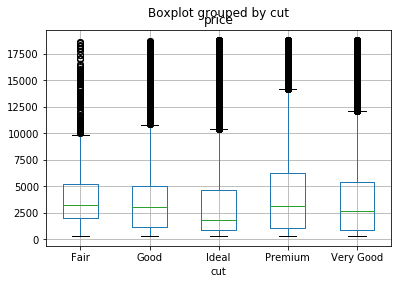

In [31]:
# To illustrate as boxplot
boxplot7 = df.boxplot("price", by="cut")
boxplot7

#### #7 conclusion
The above boxpolt and descriptive statistics show as following:

- Fair cut is skewed low side with a mean of 4357.50, a min of 337.00, a max of 18574.00, and a standard deviation of 3561.14. It has many outliers.
- Good cut is skewed low side with a mean of 3926.40, a min of 327.00, a max of 18707.00, and a standard deviation of 3676.77. It has many outliers.
- Ideal cut is skewed low side with a mean of 3456.94, a min of 326.00, a max of 18806.00, and a standard deviation of 3676.77. It has many outliers.
- Premium cut is skewed low side with a mean of 4579.68, a min of 326.00, a max of 18823.00, and a standard deviation of 4343.91. It has many outliers.
- Very Good cut is skewed low side with a mean of 3981.66, a min of 336.00, a max of 18818.00, and a standard deviation of 3936.01. It has many outliers.


- Center and spread

    - Ideal cut has the lowest median in 5 cuts. It means that over 50% of Ideal cuts price are higher than median of Ideal cut.
    - Premium cut has the largest IQR (Q3 - Q1) = 5244.25. In contrast Fair cut has the lowest IQR (Q3 - Q1) = 3148.00.
    - Premium cut has the highest maximum price(18823.00), but Fair cut has the lowest maximum price(18574.00).


- Look for indicators of nonnormal or unusual data
    - Ideal cut is skewed low side. The majority of the data are located on low side of the graph. The data may not be normally distributed.
    - Good cut is skewed middle postion. The data may be normally distributed.
    - Very Good, Premium and Fair cuts are all skewed low side.
    - All of 5 cuts have many outilers.


- Assess and compare groups
    - All of 5 cuts have different median prices. Premium cut has the highest median.
    - The price of Premium and Very Good cut are more variable than others

#### #8. (4 Points) Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions.
- To get sub data set, column are 'x', 'y', 'z', 'depth'.
- To rename columns as 'length', 'width', 'depth', 'total depth percentage'
- To show describe and histogram

In [32]:
# To get sub data set, column are 'x', 'y', 'z', 'depth'. 
# Then To rename columns as 'length', 'width', 'depth', 'total depth percentage'.
df8 = df[['x', 'y', 'z', 'depth']].rename(columns={'x':'length', 'y':'width', 'z':'depth', 'depth':'total depth percentage'})

# To show the descriptive. 
df8.describe()

,length,width,depth,total depth percentage
count,53920.000000,53920.000000,53920.000000,53920.000000
mean,5.731627,5.734887,3.540046,61.749514
std,1.119423,1.140126,0.702530,1.432331
min,3.730000,3.680000,1.070000,43.000000
25%,4.710000,4.720000,2.910000,61.000000
50%,5.700000,5.710000,3.530000,61.800000
75%,6.540000,6.540000,4.040000,62.500000
max,10.740000,58.900000,31.800000,79.000000


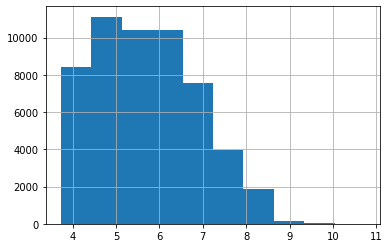

In [33]:
df8['length'].hist()

- Length

The above histogram and descriptive statistics show that the overall distribution of length concentrates between 4.71 and 6.54 mm, with a mean of 5.73 mm, a minimum of 3.73 mm, and a max of 10.47 mm. The histogram indicates that there are some outliers, since three standard deviations above the mean is roughly 9.09 mm. Anything past 9.09 mm could be considered an outlier.

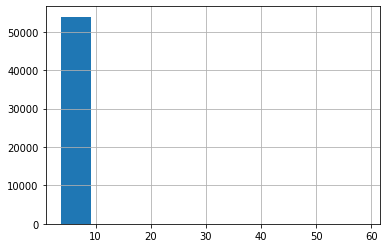

In [34]:
df8['width'].hist()

- Width

The above histogram and descriptive statistics show that the overall distribution of width concentrates between 4.72 and 6.54 mm, with a mean of 5.73 mm, a minimum of 0 mm, and a max of 58.90 mm. The maximum of 58.90 mm tells us that there are definitely outliers because the 75th percentile is 6.54, and 3 standard deviations above the mean would be 9.15. Anything past 9.15 mm could be considered an outlier.

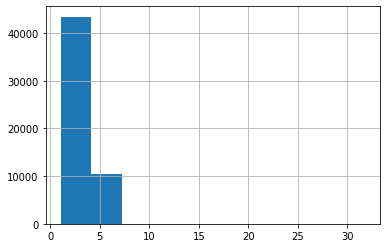

In [35]:
df8['depth'].hist()

- Depth

The above histogram and descriptive statistics show that the overall distribution of depth concentrates between 2.91 and 4.04 mm, with a mean of 3.54 mm, a minimum of 1.07 mm, and a max of 31.8mm. The histogram indicates that there are some outliers, since three standard deviations above the mean is roughly 5.64 mm. Anything past 5.64 mm could be considered an outlier.

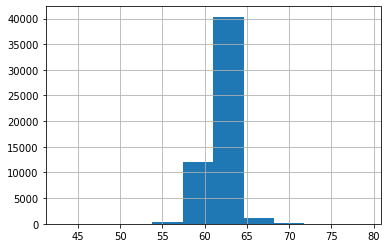

In [36]:
df8['total depth percentage'].hist()

- Total Depth Percentage

The above histogram and descriptive statistics show that the overall distribution of total depth percentage concentrates between 61.00% and 62.50%, with a mean of 61.75%, a minimum of 43.00%, and a max of 79.00%. The histogram indicates that the maximum of 79.00% tells us that there are definitely outliers because the 75th percentile is 62.50%, and 3 standard deviations above the mean would be 66.04%. Anything past 66.04% could be considered an outlier.

#### #8 Conclusion
-  The length, width, depth, and total depth attributes are all have outilers.

#### #9. (4 Points) Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?
- To check that carat is not in the range [0.2, 5.01] and price is not 0
- To illustrate as scatter

In [37]:
# To check that carat is not in the range [0.2, 5.01]
pd.value_counts((df['carat'] >= 0.2) & (df['carat'] <= 5.01))

True    53920
Name: carat, dtype: int64

In [38]:
# To check that price is not 0
pd.value_counts(df['price'] == 0.0)

False    53920
Name: price, dtype: int64

In [39]:
df[['carat', 'price']].describe()

,carat,price
count,53920.000000,53920.000000
mean,0.797698,3930.993231
std,0.473795,3987.280446
min,0.200000,326.000000
25%,0.400000,949.000000
50%,0.700000,2401.000000
75%,1.040000,5323.250000
max,5.010000,18823.000000


After checking, there are no data that price is zero and carat is not in the range [0.2, 5.01]

Then, to illustrate as scatter chart.

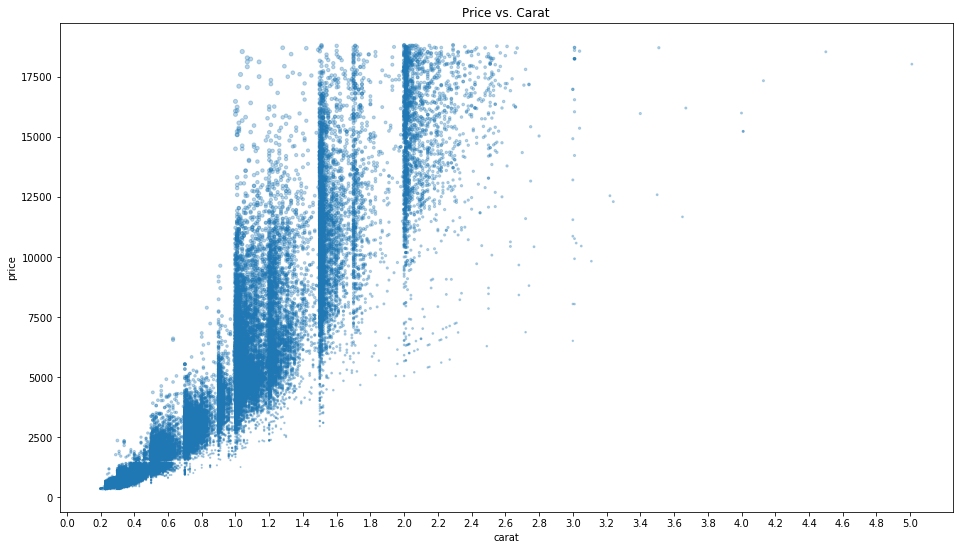

In [40]:
# To set scale of x-axis
my_x_ticks = np.arange(0, 5.2, 0.2)

# To illustrate as scatter
ax9 = df.plot.scatter(x='carat',
                      y='price', alpha=0.3, title = 'Price vs. Carat', s = (df['price per carat'] / 1000), figsize=(16,9),
                     xticks = my_x_ticks)

#### #9 Conclusion
The above descriptive statistics and scatter chart show as following:
- There is a positive relationship between Price and Carat.
- The trend appears to be roughly upward curve, though certainly not perfectly so.
- The dark blue shows that the data are concentrated. The light blue shows that data quantity is less. 
- The size of the point shows the value of the price per carat. The bigger point shows the higher price pre carat.
- When carat is 0.5, 0.7, 0.9, 1.0, 1.2, 1.5, 1.7, 2 and 3, there are clear groupings.
- Data concentrates on that carat is (Q3, Q1) = (0.4, 1.04) and price is (Q3, Q1) = (5323.25, 949.00)
- There are some outliers, and we should pay attention to them.
- The carat is probably a good price predictor.